In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from textblob import TextBlob

# nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
from wordcloud import WordCloud

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('tweets_file123.csv')
df.head()

,Unnamed: 0,User,text
0,0,andrew97229057,@Cricketracker @dhoni
1,1,devamitrapanda,@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐
2,2,devamitrapanda,RT @ULHASCHITHARIA: @devamitrapanda @TanayaMod...
3,3,ULHASCHITHARIA,@devamitrapanda @TanayaModak_ @Dhoni Absolutel...
4,4,devamitrapanda,"@ULHASCHITHARIA @TanayaModak_ Was pleasure,esc..."


In [4]:
df.info

<bound method DataFrame.info of     Unnamed: 0             User  \
0            0   andrew97229057   
1            1   devamitrapanda   
2            2   devamitrapanda   
3            3   ULHASCHITHARIA   
4            4   devamitrapanda   
5            5    krishnpandeyy   
6            6    Durga03985780   
7            7        313Amirza   
8            8       1534Gaurav   
9            9         abcmoshs   
10          10          JintoRs   
11          11        m_arulvel   
12          12    goanvartalive   
13          13  Praveen59839036   
14          14  BALAJIS20364676   
15          15   Murugavel_agri   
16          16        shiva7303   
17          17        Saimani07   
18          18        yesveesbi   
19          19  khela_parminder   
20          20  therisingpanjab   
21          21  22875bc8b147415   

                                                 text  
0                               @Cricketracker @dhoni  
1          @ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃

In [5]:
df.isnull().sum()

Unnamed: 0    0
User          0
text          0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'User', 'text'], dtype='object')

In [7]:
text_df =df.drop(['Unnamed: 0', 'User'], axis=1)

In [8]:
text_df.head()

,text
0,@Cricketracker @dhoni
1,@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐
2,RT @ULHASCHITHARIA: @devamitrapanda @TanayaMod...
3,@devamitrapanda @TanayaModak_ @Dhoni Absolutel...
4,"@ULHASCHITHARIA @TanayaModak_ Was pleasure,esc..."


In [9]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@Cricketracker @dhoni 

@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐 

RT @ULHASCHITHARIA: @devamitrapanda @TanayaModak_ @Dhoni Absolutely . You used very appropriate word 👌👌👌 

@devamitrapanda @TanayaModak_ @Dhoni Absolutely . You used very appropriate word 👌👌👌 

@ULHASCHITHARIA @TanayaModak_ Was pleasure,escastic to watch @Dhoni to play 



In [10]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+\www\S+https\s+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
text_df.text = text_df['text'].apply(data_processing)


In [12]:
text_df =text_df.drop_duplicates('text')


In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [15]:
text_df.head()


,text
0,cricketracker dhoni
1,ulhaschitharia tanayamodak_ dhoni
2,rt ulhaschitharia devamitrapanda tanayamodak_ ...
3,devamitrapanda tanayamodak_ dhoni absolutely u...
4,ulhaschitharia tanayamodak_ pleasureescastic w...


In [16]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

cricketracker dhoni 

ulhaschitharia tanayamodak_ dhoni 

rt ulhaschitharia devamitrapanda tanayamodak_ dhoni absolutely used appropriate word 

devamitrapanda tanayamodak_ dhoni absolutely used appropriate word 

ulhaschitharia tanayamodak_ pleasureescastic watch dhoni play 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes


In [18]:
from textblob import TextBlob


In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [21]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [22]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)


<Axes: xlabel='sentiment', ylabel='count'>

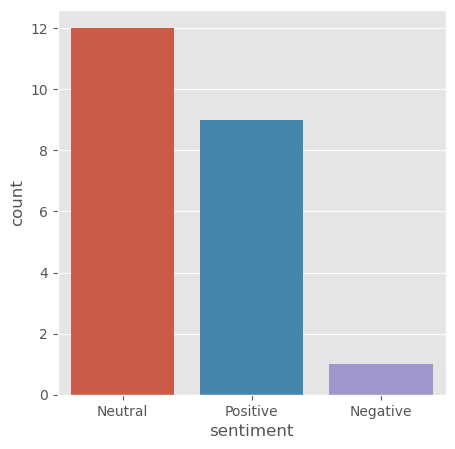

In [23]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

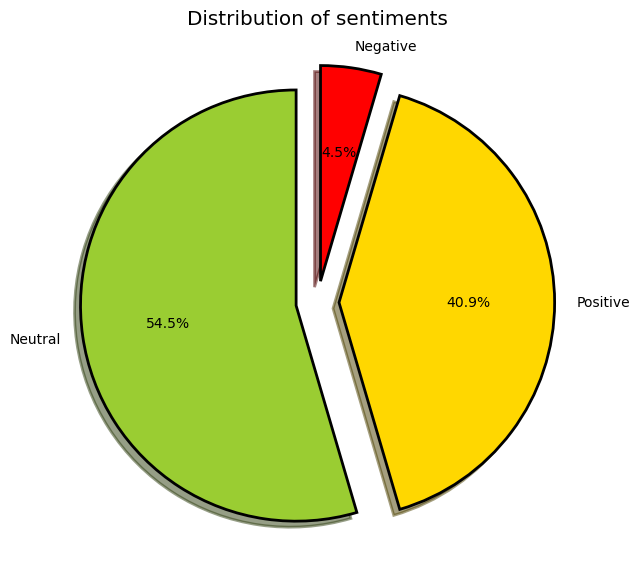

In [24]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor' :"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors =colors,
        startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [25]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
14,rt velai_illa_vasu dhoni illustration happy bi...,0.800,Positive
18,settling ipl2022 dhoni hands baton jaddu csk c...,0.800,Positive
15,dhoni legendary captaincy tenure yellow skip c...,0.500,Positive
16,imvkohli msdhoni king imvkohli captain cool dh...,0.425,Positive
2,rt ulhaschitharia devamitrapanda tanayamodak_ ...,0.350,Positive


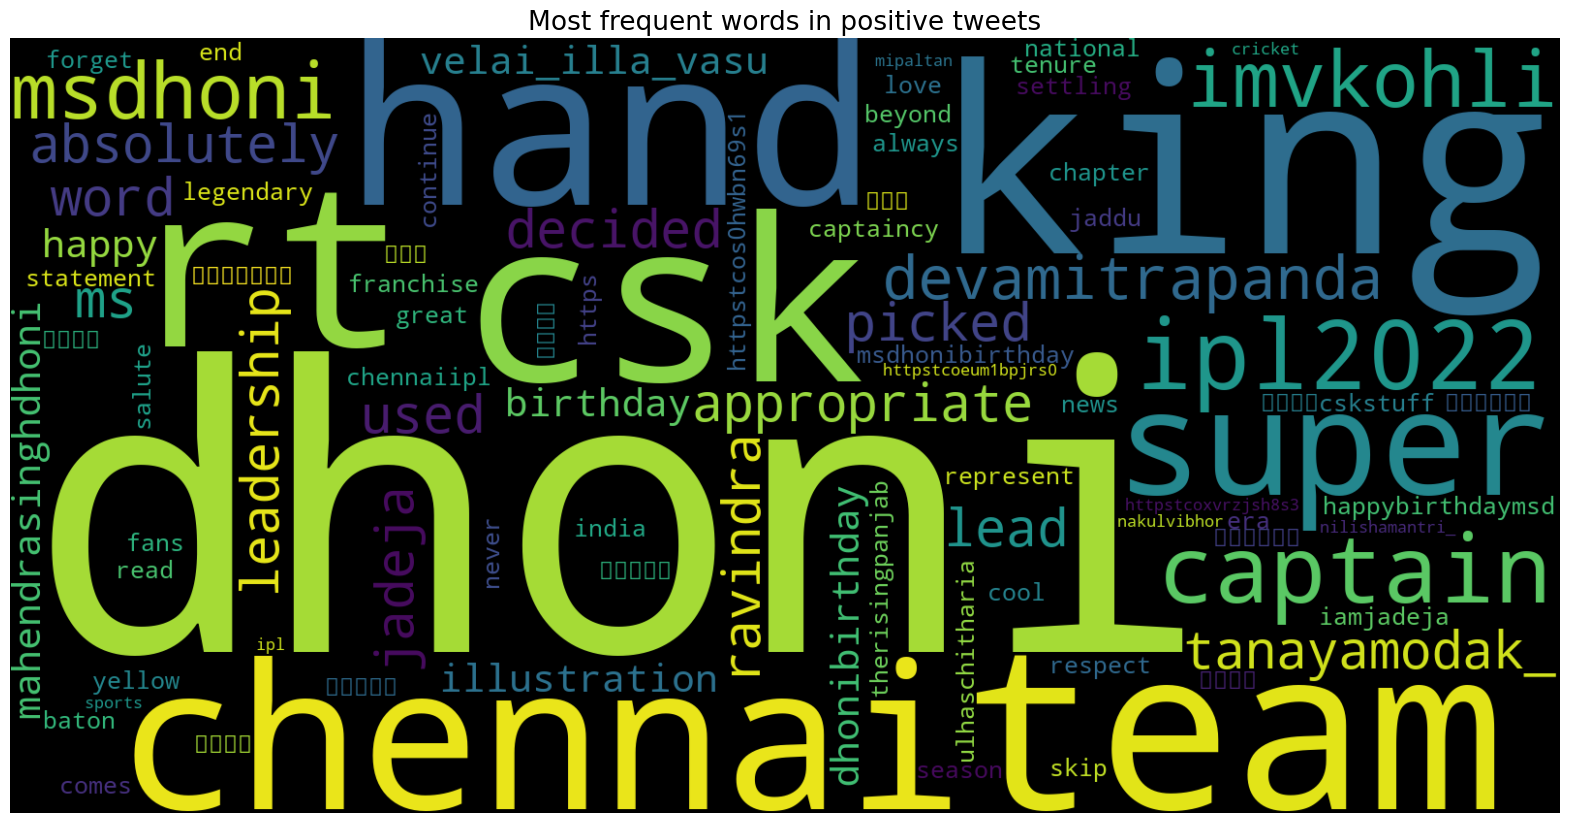

In [26]:
text = ' '.join ([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [27]:
neg_tweets = text_df[text_df.sentiment == 'Nagative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment


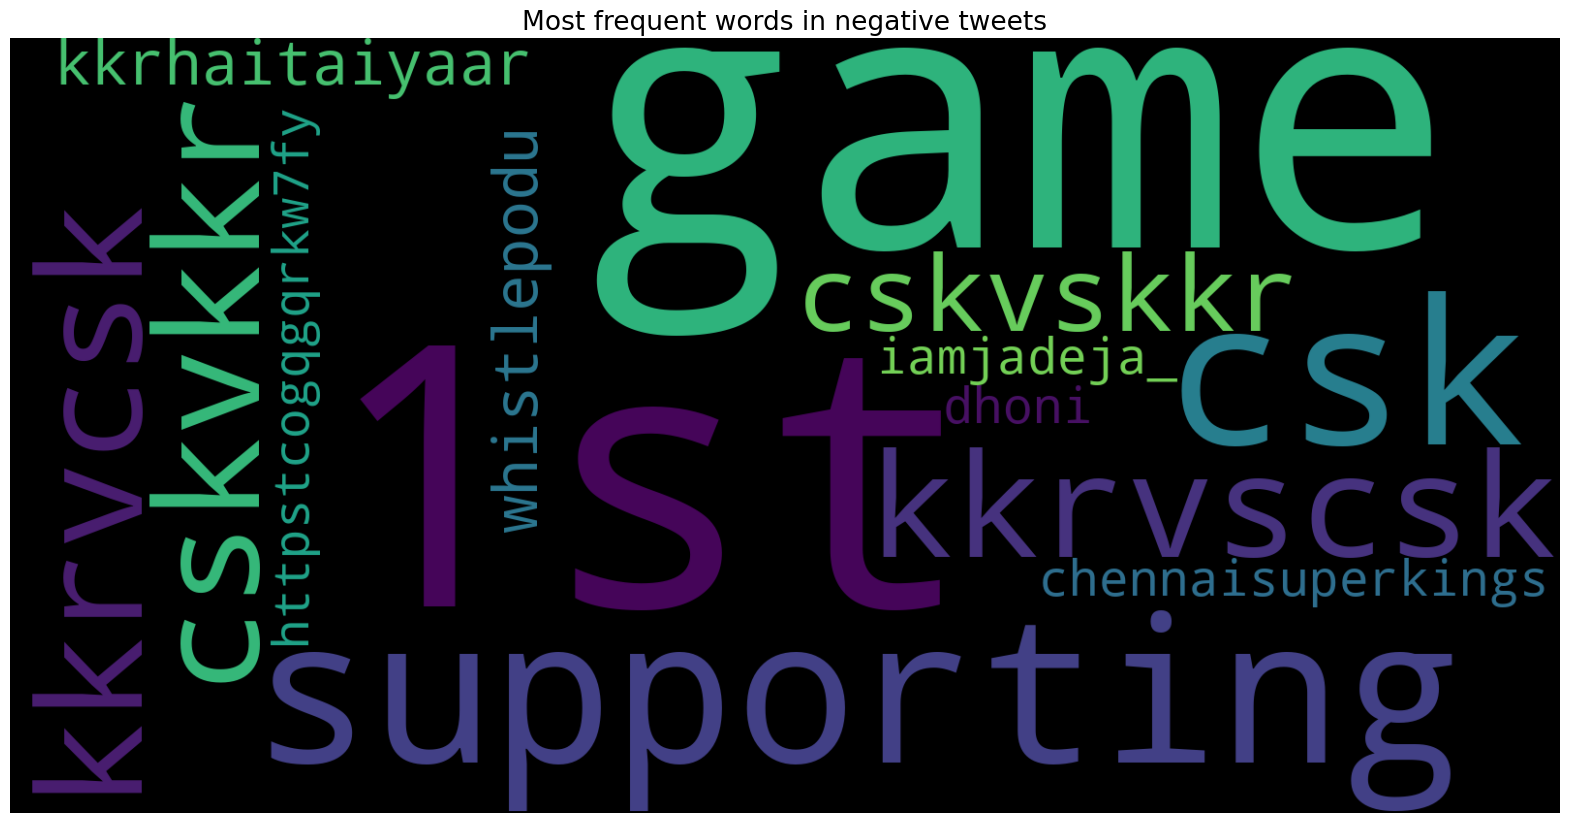

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Negatif tweetleri seç
neg_tweets = text_df[text_df.sentiment == 'Negative']

# Negatif tweetleri polariteye göre sırala
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)

# Negatif tweetlerin içeriğini birleştir
text = ' '.join([word for word in neg_tweets['text']])

# Eğer metinde en az bir kelime varsa, kelime bulutunu oluştur
if len(text.split()) > 0:
    plt.figure(figsize=(20,15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most frequent words in negative tweets', fontsize=19)
    plt.show()
else:
    print("Hata: Negatif tweetlerin içeriğinde hiç kelime bulunamadı.")

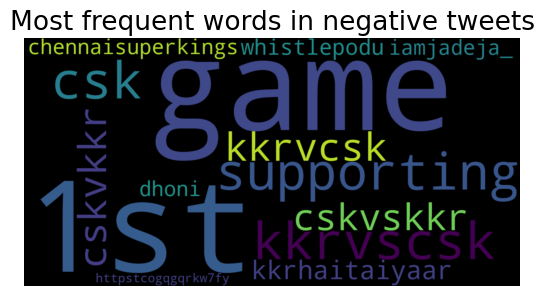

In [29]:
text = ' '.join ([word for word in neg_tweets['text']])
# Eğer metinde en az bir kelime varsa, kelime bulutunu oluştur
if len(text.split()) > 0:
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most frequent words in negative tweets', fontsize=19)
    plt.show()
else:
    print("Hata: Negatif tweetlerin içeriğinde hiç kelime bulunamadı.")

plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [30]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,text,polarity,sentiment
0,cricketracker dhoni,0.0,Neutral
1,ulhaschitharia tanayamodak_ dhoni,0.0,Neutral
4,ulhaschitharia tanayamodak_ pleasureescastic w...,0.0,Neutral
5,मझ लग नह थ कdhoni इतन खल ge आखर शर शर हत ह कब ...,0.0,Neutral
6,dhoni thangameyyy httpstcoaapezf7rds,0.0,Neutral


In [31]:
nag_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
14,rt velai_illa_vasu dhoni illustration happy bi...,0.800,Positive
18,settling ipl2022 dhoni hands baton jaddu csk c...,0.800,Positive
15,dhoni legendary captaincy tenure yellow skip c...,0.500,Positive
16,imvkohli msdhoni king imvkohli captain cool dh...,0.425,Positive
2,rt ulhaschitharia devamitrapanda tanayamodak_ ...,0.350,Positive


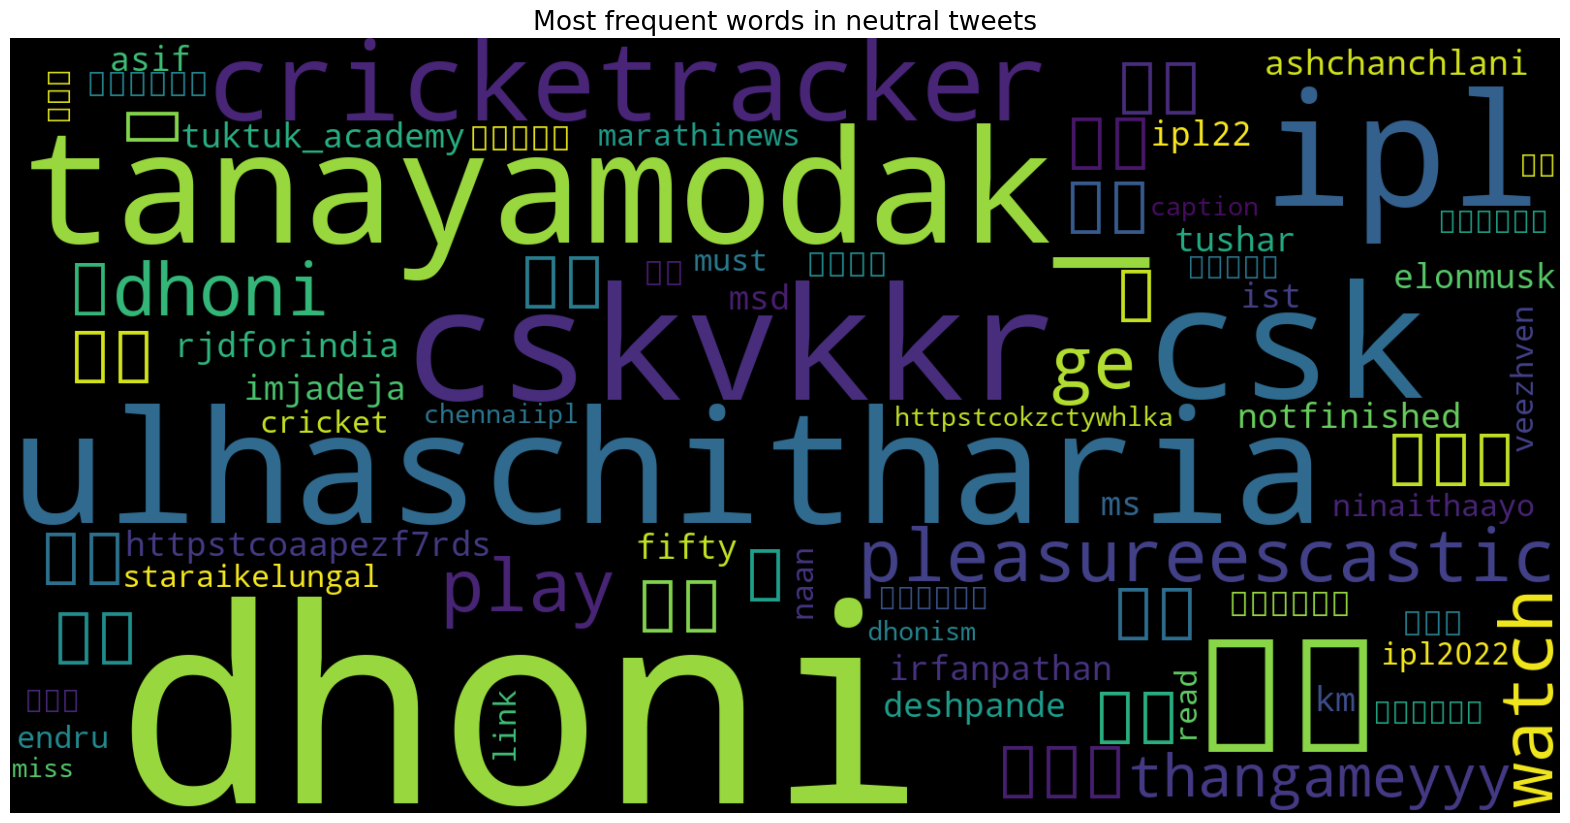

In [32]:
text = ' '.join ([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [33]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [35]:
print(dir(vect))  # Vect nesnesi üzerindeki tüm özellikleri gösterir


NameError: name 'vect' is not defined

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [38]:
feature_names = vect.get_feature_names_out()


In [39]:
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 359

First 20 features:
 ['1st' '1st game' '2022' '2022 ᴍᴇ' 'absolutely' 'absolutely used' 'always'
 'always மஞசள' 'appropriate' 'appropriate word' 'ashchanchlani'
 'ashchanchlani elonmusk' 'asif' 'asif tushar' 'baton' 'baton jaddu'
 'beyond' 'beyond read' 'birthday' 'birthday dhoni']


In [40]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X) 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [42]:
print("size of x_train:",(x_train.shape))
print("size of y_train:",(y_train.shape))
print("size of x_test:",(x_test.shape))
print("size of x_test:",(y_test.shape))

size of x_train: (17, 359)
size of y_train: (17,)
size of x_test: (5, 359)
size of x_test: (5,)


In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
loreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {: 0.2f}%".format(loreg_acc*100))

Test accuracy:  80.00%


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print ('\n')
print(classification_report(y_test, logreg_pred))

[[3 0]
 [1 1]]


              precision    recall  f1-score   support

     Neutral       0.75      1.00      0.86         3
    Positive       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



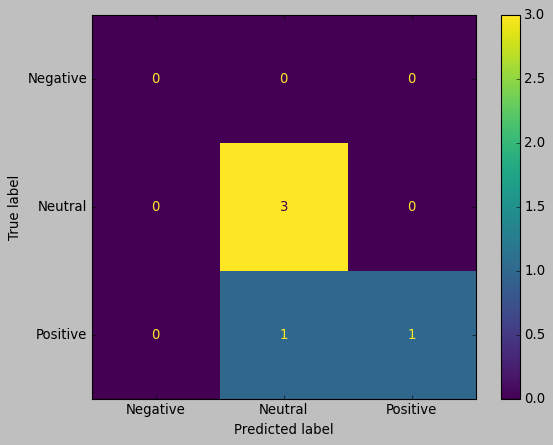

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [46]:
from sklearn.model_selection import GridSearchCV


In [47]:
param_grid={'C':[0.001, 0.01, 0.1, 1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [48]:
print("Best parameteres:", grid.best_params_)

Best parameteres: {'C': 1}


In [49]:
y_pred = grid.predict(x_test)

In [50]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:0.2f}%".format(logreg_acc*100))

Test accuracy: 80.00%


In [51]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3 0]
 [1 1]]


              precision    recall  f1-score   support

     Neutral       0.75      1.00      0.86         3
    Positive       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [52]:
from sklearn.svm import LinearSVC

In [53]:

SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [54]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:0.2f}%".format(svc_acc*100))


test accuracy: 80.00%


In [55]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[3 0]
 [1 1]]


              precision    recall  f1-score   support

     Neutral       0.75      1.00      0.86         3
    Positive       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [56]:
grid = {
    'C':[0.01, 0.1, 1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\deniz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default val

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [57]:
print("Best parameteres:", grid.best_params_)

Best parameteres: {'C': 0.01}


In [58]:
y_pred = grid.predict(x_test)


In [59]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:0.2f}%".format(logreg_acc*100))

Test accuracy: 80.00%


In [60]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3 0]
 [1 1]]


              precision    recall  f1-score   support

     Neutral       0.75      1.00      0.86         3
    Positive       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

